In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from dotenv import load_dotenv
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import silhouette_score


In [15]:
# Get paths from environment variables
data_dir = os.getenv('DATA_DIR')

# Read the data files
city_df = pd.read_csv(os.path.join(data_dir, 'City_energy_profiles.csv'))
county_df = pd.read_csv(os.path.join(data_dir, 'County_energy_profiles.csv'))

In [16]:
# 1. Basic Statistical Analysis
def print_basic_stats(df, dataset_name):
    print(f"\n{dataset_name} Dataset Statistics:")
    print(f"Number of records: {len(df)}")
    print("\nNumerical Columns Summary:")
    print(df.describe())
    
    # Check for missing values
    missing = df.isnull().sum()
    if missing.any():
        print("\nMissing Values:")
        print(missing[missing > 0])

# Run analyses
print_basic_stats(city_df, "City")
print_basic_stats(county_df, "County")


City Dataset Statistics:
Number of records: 273

Numerical Columns Summary:
         latitude   longitude     population  doe_climate_zone  \
count  271.000000  271.000000     271.000000        271.000000   
mean    39.167552 -105.259151   14613.468635          5.354244   
std      1.054287    1.665428   57254.776938          0.798129   
min     37.015493 -109.008590       7.000000          4.000000   
25%     38.226835 -106.146252     445.000000          5.000000   
50%     39.361015 -105.056711    1227.000000          5.000000   
75%     40.045075 -104.370990    6025.500000          6.000000   
max     40.984988 -102.124589  663303.000000          7.000000   

       Residential Electricity  consumption (MWh)  \
count                                2.730000e+02   
mean                                 5.111343e+04   
std                                  2.004013e+05   
min                                  6.357699e+01   
25%                                  1.349853e+03   
50%       

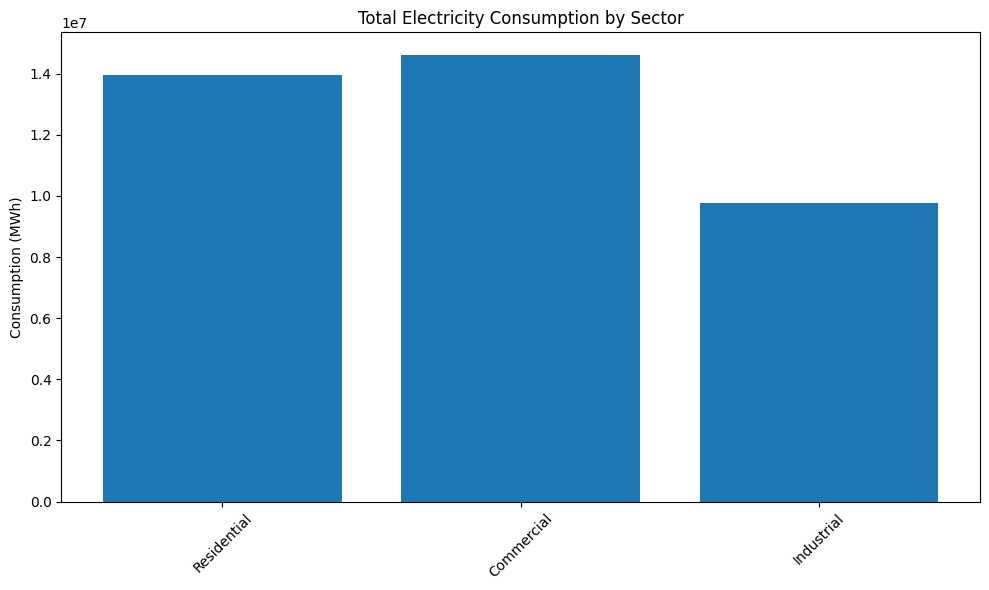

In [17]:
# 2. Energy Consumption Analysis
def analyze_energy_consumption(df):
    # Calculate total consumption by sector
    sectors = {
        'Residential': df['Residential Electricity  consumption (MWh)'].sum(),
        'Commercial': df['Commercial Electricity  consumption (MWh)'].sum(),
        'Industrial': df['Industry Electricity  consumption (MWh)'].sum()
    }
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    plt.bar(sectors.keys(), sectors.values())
    plt.title('Total Electricity Consumption by Sector')
    plt.ylabel('Consumption (MWh)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    # plt.savefig('data/sector_consumption.png')
    plt.show()


analyze_energy_consumption(city_df)

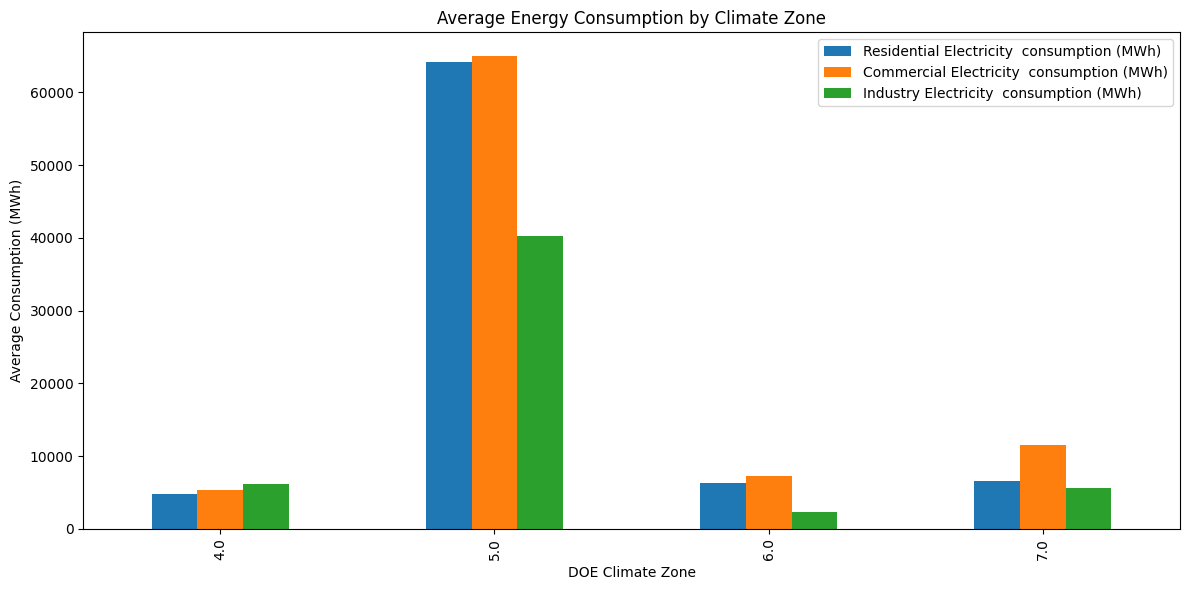

In [18]:
def analyze_climate_zones(df):
    # Average consumption by climate zone using a list of columns
    columns_to_analyze = [
        'Residential Electricity  consumption (MWh)',
        'Commercial Electricity  consumption (MWh)',
        'Industry Electricity  consumption (MWh)'
    ]
    
    climate_analysis = df.groupby('doe_climate_zone')[columns_to_analyze].mean()
    
    # Create plot
    climate_analysis.plot(kind='bar', figsize=(12, 6))
    plt.title('Average Energy Consumption by Climate Zone')
    plt.ylabel('Average Consumption (MWh)')
    plt.xlabel('DOE Climate Zone')
    plt.tight_layout()
    # plt.savefig('../data/climate_zone_analysis.png')
    plt.show()

# Run the analysis
analyze_climate_zones(city_df)

In [19]:
# Select features and target variable
features = [
    'population', 
    'doe_climate_zone', 
    'Residential Electricity  consumption (MWh)', 
    'Commercial Electricity  consumption (MWh)'
]
target = 'Industry Electricity  consumption (MWh)'

# Drop rows with missing values
city_df = city_df.dropna(subset=features + [target])

In [20]:
# Split data into features (X) and target (y)
X = city_df[features]
y = city_df[target]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print("Linear Regression model trained.")

Linear Regression model trained.


In [22]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

Random Forest Regressor model trained.


In [23]:
# Train K-Means Clustering
kmeans_model = KMeans(n_clusters=3, random_state=42)
kmeans_model.fit(X_train)
print("K-Means Clustering model trained.")

K-Means Clustering model trained.


In [24]:
# 3. Model Evaluation
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"R²: {r2_score(y_test, y_pred_lr)}")

# Evaluate Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Regressor Evaluation:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

# Evaluate K-Means Clustering
# Note: K-Means is unsupervised, so we evaluate clustering quality
silhouette_avg = silhouette_score(X_test, kmeans_model.predict(X_test))
print("\nK-Means Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_avg}")

Linear Regression Evaluation:
MAE: 17274.50589667406
MSE: 3238976130.9931483
R²: -1.171707709707467

Random Forest Regressor Evaluation:
MAE: 12797.836735590863
MSE: 1627876745.2236247
R²: -0.09147839782679834

K-Means Clustering Evaluation:
Silhouette Score: 0.6187133972811363


Comparison of Regression Models:

Linear Regression:
MAE: 17274.50589667406
MSE: 3238976130.9931483
R²: -1.171707709707467

Random Forest Regressor:
MAE: 12797.836735590863
MSE: 1627876745.2236247
R²: -0.09147839782679834


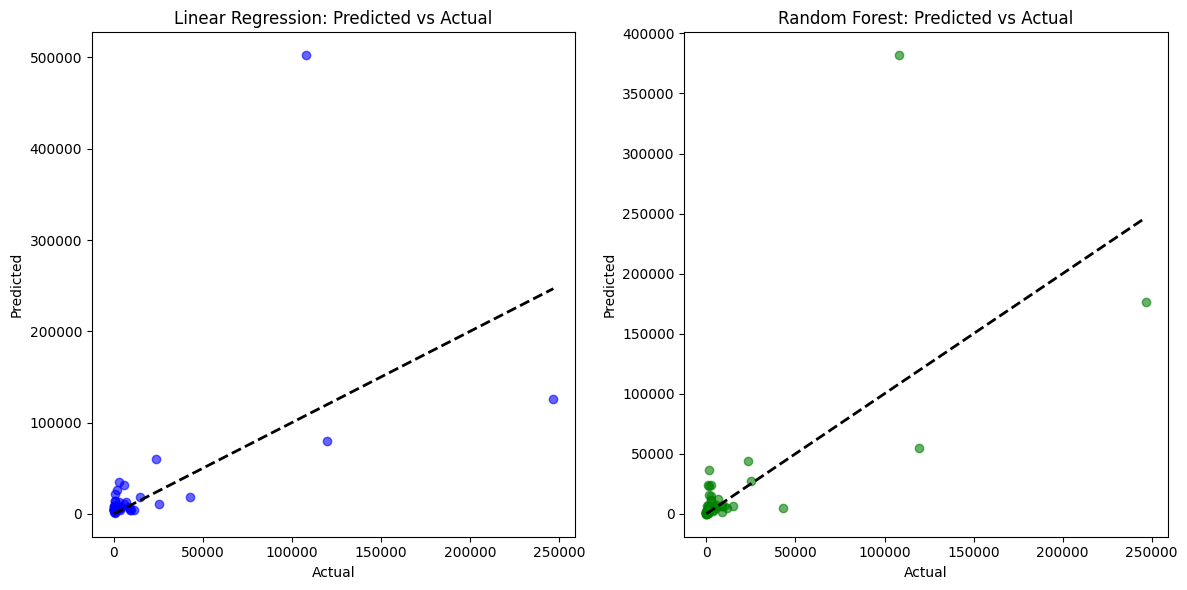

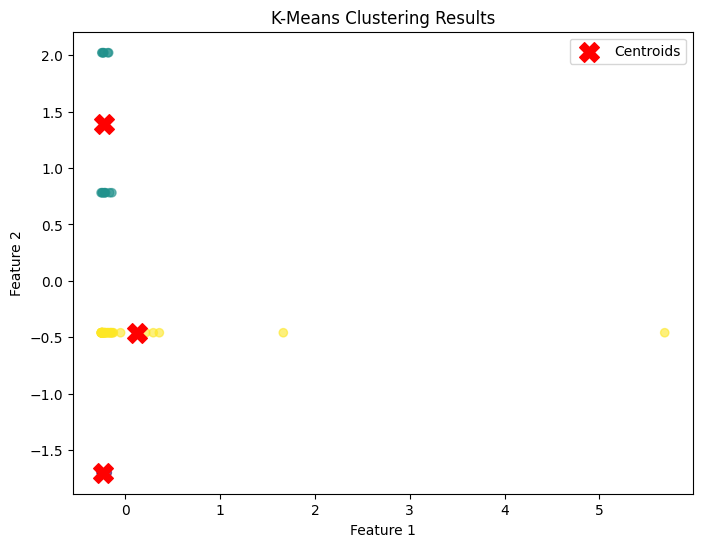

In [25]:
# Compare Regression Models
def compare_regression_models(y_test, y_pred_lr, y_pred_rf):
    print("Comparison of Regression Models:")
    print("\nLinear Regression:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
    print(f"R²: {r2_score(y_test, y_pred_lr)}")

    print("\nRandom Forest Regressor:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred_rf)}")
    print(f"R²: {r2_score(y_test, y_pred_rf)}")

# Visualize Predicted vs Actual for Regression Models
def plot_regression_results(y_test, y_pred_lr, y_pred_rf):
    plt.figure(figsize=(12, 6))

    # Linear Regression
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_lr, alpha=0.6, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title('Linear Regression: Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    # Random Forest
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_rf, alpha=0.6, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title('Random Forest: Predicted vs Actual')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    plt.tight_layout()
    plt.show()

# Visualize Clustering Results
def plot_kmeans_clusters(X_test, kmeans_model):
    plt.figure(figsize=(8, 6))
    clusters = kmeans_model.predict(X_test)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=clusters, cmap='viridis', alpha=0.6)
    plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], 
                s=200, c='red', marker='X', label='Centroids')
    plt.title('K-Means Clustering Results')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Run comparisons and visualizations
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

compare_regression_models(y_test, y_pred_lr, y_pred_rf)
plot_regression_results(y_test, y_pred_lr, y_pred_rf)
plot_kmeans_clusters(X_test, kmeans_model)

# Results

### Linear Regression Evaluation:
- MAE (Mean Absolute Error): 17,274.51 indicates that, on average, the model's predictions are off by this amount.
- MSE (Mean Squared Error): 3,238,976,130.99 is a large value, showing significant errors in predictions.
- R² (Coefficient of Determination): -1.17 indicates that the model performs worse than a simple mean-based prediction. A negative R² suggests the model is not capturing the relationship between features and the target variable effectively.

Conclusion: The Linear Regression model is not performing well and may not be suitable for this dataset.

### Random Forest Regressor Evaluation:
- MAE: 12,797.84 is better than Linear Regression, meaning the predictions are closer to the actual values.
- MSE: 1,627,876,745.22 is significantly lower than Linear Regression, indicating better performance.
- R²: -0.09 is still negative but much closer to 0, suggesting the model is slightly better than Linear Regression but still underperforming.

Conclusion: Random Forest performs better than Linear Regression but still struggles to explain the variance in the data. Hyperparameter tuning or feature engineering might improve its performance.

### Silhouette Score: 
- 0.6187 indicates that the clusters are well-formed and distinct. A score closer to 1 is ideal, and values above 0.5 are generally considered good.
  
Conclusion: The K-Means clustering model is performing well in grouping the data into distinct clusters.

# Next Steps:

* For Regression Models:

    - Investigate feature importance (e.g., using feature_importances_ for Random Forest) to identify which features contribute most to the predictions.
    - Perform feature engineering (e.g., create new features, remove irrelevant ones).
    - Tune hyperparameters for Random Forest (e.g., number of trees, max depth) using GridSearchCV or RandomizedSearchCV.
    - Consider trying other regression models like Gradient Boosting or XGBoost.

* For K-Means Clustering:

    - Visualize the clusters to understand their characteristics.
    - If the dataset has many features, consider dimensionality reduction (e.g., PCA) to improve clustering interpretability.